In [5]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize

# Task 1 - 1D Monte-Carlo integration

Perform the MC-integration by sampling points uniformly and calculate the integrand for each point. Since we use GSL we assume that the sampled points are independently sampled, that there is a mean and a standard deviation and that the number of points $N$ is large enough. Thus we apply the central limit theorem for each $N$. This enables us to estimate the standard deviation of the integral value $\sigma_I$ as:

$$ \sigma_I = \sigma_f/\sqrt{N},$$
where $\sigma_f$ is the standard deviation of the function that we sample. We estimate this quantity by calculating the standard deviation of the sampled points.

The integral is:

$$ I = \int_0^1 x(1-x) dx = \frac{1}{6}$$

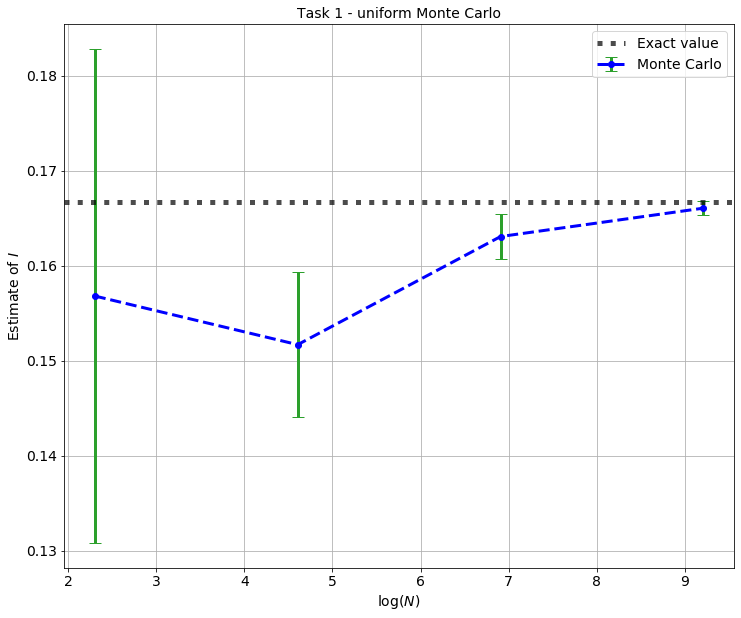

In [44]:
# Load data
data = np.loadtxt('task1/task1.dat')

fig, ax = plt.subplots(figsize=(12,10))
ax.errorbar(x=np.log(data[:,0]), y=data[:,1], yerr=data[:,2], ecolor='C2', capsize=6, linewidth=3, markersize=6, fmt='bo--', label='Monte Carlo')
ax.axhline(1/6, c='k', linestyle=':', linewidth=5, alpha=0.7, label='Exact value')
ax.set_xlabel(r'log($N$)')
ax.set_ylabel(r'Estimate of $I$')
ax.grid()
ax.set_title("Task 1 - uniform Monte Carlo")
ax.legend(loc='best')


plt.savefig("task1/task1.png")

# Task 2 - Importance sampling

Redo task 1, but instead of sampling uniformly sample according to importance sampling. Use the transformation method:

$$ I = \int_a^b f(x)dx = \int_a^b \frac{f(x)}{p(x)} p(x) dx = \int_a^b g(x) p(x) dx.$$

Define $y$ as the CDF for $p(x)$:

$$ y = F(x) = \int_a^x p(x')dx' \rightarrow y(x=a) = 0, y(x=b) = 1 $$
By definition of CDF:

$$ \frac{dy}{dx} = p(x) \rightarrow dy = p(x)dx, y=F(x) \rightarrow x = F^{-1}(y) $$

Which gives us:

$$I = \int_0^1 g(x(y))dy .$$

In our case, $a=0$ and $b=1$ which means that dx is the same interval as dy. We also have $p(x) \propto \sin{\pi x}$.
We want to normalize $p(x)$:

$$ 1 = C\int_0^1 p(x)dx = 2\frac{C}{\pi} \rightarrow C = \frac{\pi}{2}. $$
Which means $p(x) = \frac{\pi}{2} \sin{\pi x}$. Thus our CDF is:

$$ y = F(x) = \frac{1}{2} \left(1-\cos{\pi(x)} \right) \rightarrow x = F^{-1}(y) = \frac{1}{\pi} \arccos{(1-2y)}, y \in [0,1]$$

And finally:

$$g(x) = \frac{f(x)}{p(x)} = 2x(1-x)/(\pi \sin{\pi x}). $$

Procedure: Sample points $y_i$ in the region $y \in [0,1]$, and calculate the corresponding $x_i$. Then, sample $g(x)$ for those points $x_i$, and calculate the mean and standard deviation as in task 1.

In [ ]:
# Plot histograms




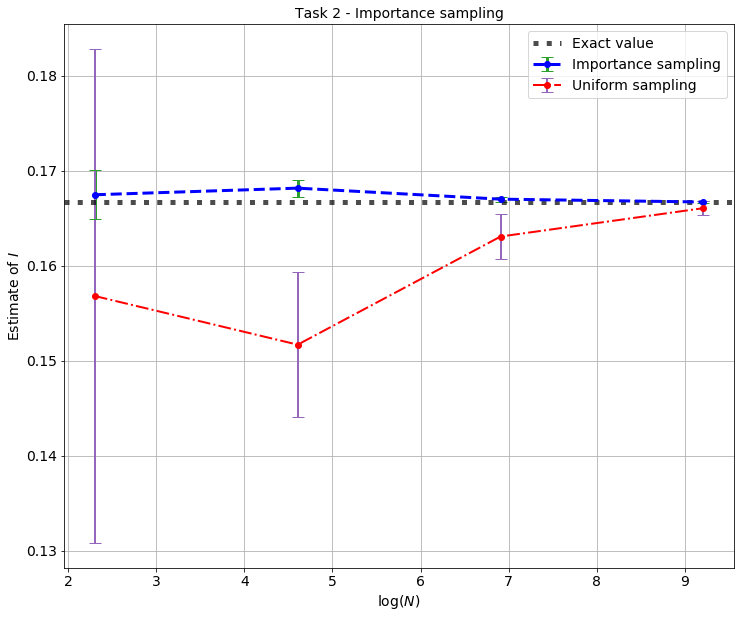

In [45]:
# Load data
data_i = np.loadtxt('task2/task2.dat')
data_u = np.loadtxt('task1/task1.dat')

fig, ax = plt.subplots(figsize=(12,10))
ax.errorbar(x=np.log(data_i[:,0]), y=data_i[:,1], yerr=data_i[:,2], ecolor='C2', capsize=6, linewidth=3, markersize=6, fmt='bo--', label='Importance sampling')
ax.errorbar(x=np.log(data_u[:,0]), y=data_u[:,1], yerr=data_u[:,2], ecolor='C4', capsize=6, linewidth=2, markersize=6, fmt='ro-.', label='Uniform sampling')
ax.axhline(1/6, c='k', linestyle=':', linewidth=5, alpha=0.7, label='Exact value')
ax.set_xlabel(r'log($N$)')
ax.set_ylabel(r'Estimate of $I$')
ax.grid()
ax.set_title("Task 2 - Importance sampling")
ax.legend(loc='best')


plt.savefig("task2/task2.png")